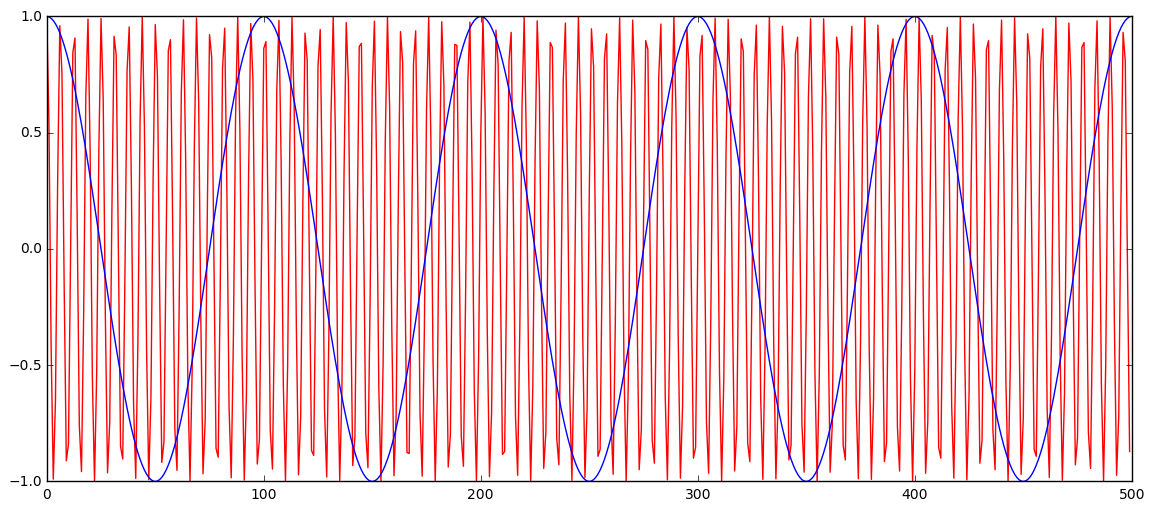

In [2]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
%matplotlib inline

N = 500      # length of input signal
M = 31       # length of filter kernels

# coefficients to get a cosine wave with period = 100:
P = 100      
B = (2*np.pi)/P

signal_a = [np.cos(i) for i in range(N)]
signal_b = [np.cos(B*i) for i in range(N)]

# plotting the two signals individually
plt.figure(figsize=(14, 6))
plt.plot(range(N), signal_a, 'r-')
plt.plot(range(N), signal_b, 'b-')
plt.show()
plt.close('all')

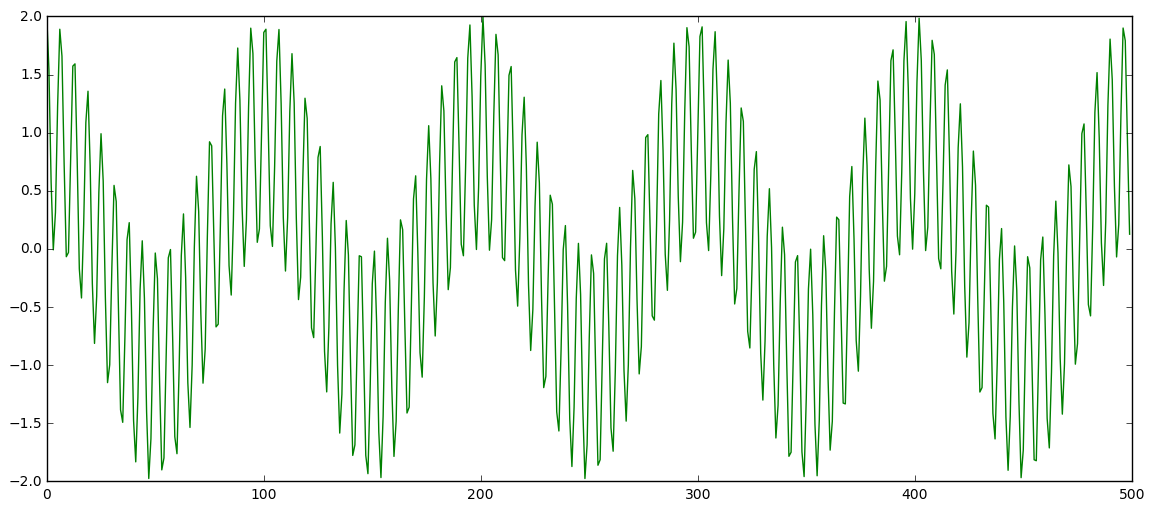

In [4]:
# clearly, the two signals have very different frequencies
# synthesizing the two signals
signal_synth = [signal_a[i] + signal_b[i] for i in range(N)]

# plotting the synthesized signal
plt.figure(figsize=(14, 6))
plt.plot(range(N), signal_synth, 'g-')
plt.show()
plt.close('all')

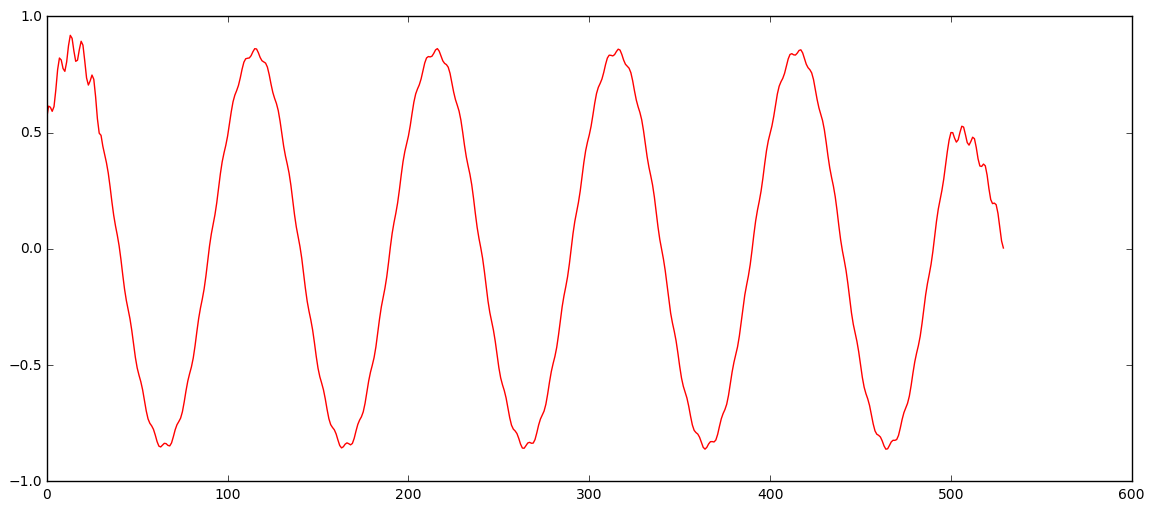

In [5]:
# the synthesized signal still shows the two frequencies of the input signals;
# one can now use a low pass filter to filter out the high-frequency signal
# and retain only the lower frequencies of the second signal

# convolution function - note that it does not discard the beginning and end
# of the resulting signal even though that might be desirable
def convolve(x, h):
  N = len(x)
  M = len(h)
  y = []
  for i in range(N + M - 1):
    y_i = 0
    for j in range(M):
      try:
        y_i += x[i - j] * h[j]
      except IndexError:
        pass
    y.append(y_i)
  return(y)

# defining a low pass filter
low_pass_filter = [1/M for i in range(M)]

# convolving the synthesized input signal with the low pass filter
convolved_signal = convolve(signal_synth, low_pass_filter)

# and plotting to check the results
plt.figure(figsize=(14, 6))
plt.plot(range(len(convolved_signal)), convolved_signal, 'r-')
plt.show()
plt.close('all')

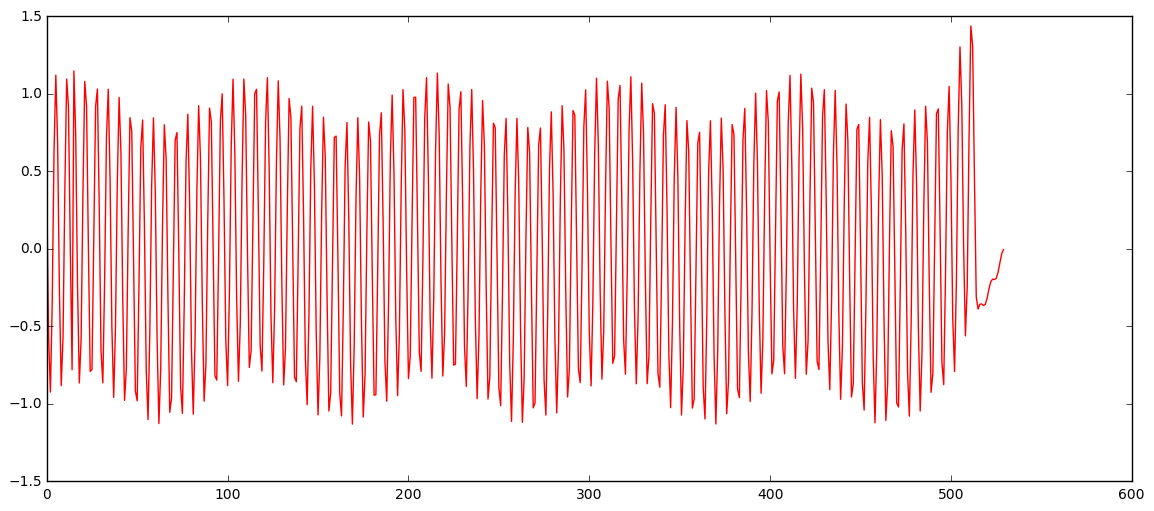

In [11]:
# apart from the beginning and end of the convolved signal, one can see that the
# high-frequency signal has almost entirely been filtered out and that only
# the low-frequency signal remains

# similarly, with a high pass filter, one can filter out the lower frequencies and
# keep only the higher ones
delta_function = [0 for i in range(M)]
delta_function[int(np.floor(M/2))] = 1
high_pass_filter = [delta_function[i] - low_pass_filter[i] for i in range(M)]

convolved_signal = convolve(signal_synth, high_pass_filter)

# and plotting to check the results
plt.figure(figsize=(14, 6))
plt.plot(range(len(convolved_signal)), convolved_signal, 'r-')
plt.show()
plt.close('all')

In [12]:
# the low-frequency component of the synthesized signal is still visible but 
# less pronounced, having been filtered out to some degree through the
# high pass filter